<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/PCA_CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#PCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#Escalar datos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/CarPrice.csv',index_col=0)

In [ ]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(f'Tamaño dataset:',df.shape)

Tamaño dataset: (205, 25)


In [ ]:
df_num = df.select_dtypes(include=['float64','int64'])
df_cat = df.select_dtypes(include=['object'])
df_dummies = pd.get_dummies(df_cat, drop_first=True).astype(int)

In [ ]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
print(df_num.mean(axis=0))
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
print(df_num.var(axis=0))

----------------------
Media de cada variable
----------------------
symboling               0.834146
wheelbase              98.756585
carlength             174.049268
carwidth               65.907805
carheight              53.724878
curbweight           2555.565854
enginesize            126.907317
boreratio               3.329756
stroke                  3.255415
compressionratio       10.142537
horsepower            104.117073
peakrpm              5125.121951
citympg                25.219512
highwaympg             30.751220
price               13276.710571
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
symboling           1.550789e+00
wheelbase           3.626178e+01
carlength           1.522087e+02
carwidth            4.601900e+00
carheight           5.970800e+00
curbweight          2.711079e+05
enginesize          1.734114e+03
boreratio           7.335631e-02
stroke              9.834309e-02
compressionratio    1.577710e+01
horsepower   

In [ ]:
#instanciamos
scaler = StandardScaler()
#hacemos fit para el escalado de variables numéricas:
scaled = scaler.fit_transform(df_num)
#definimos como dataframe las variables escaladas numéricas:
df_num_new = pd.DataFrame(scaled, columns=df_num.columns)

In [ ]:
datos = pd.concat([df_dummies,df_num_new], axis=1)
datos.shape

(205, 65)

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
modelo_pca = PCA()
modelo_pca.fit(datos)

PCA()

In [ ]:
#Cantidad de componentes:
num_componentes = modelo_pca.components_.shape[0]
print(f'Cantidad de componentes: ',num_componentes)

#Definimos como PC1, PC2, PC3, etc para nombrar cada componente:
indices = [f'PC{i+1}' for i in range(num_componentes)]

Cantidad de componentes:  65


In [ ]:
modelo_pca.components_

array([[ 7.66777406e-03,  1.39066965e-02,  2.94821092e-02, ...,
        -2.90442328e-01, -3.00798041e-01,  3.07880308e-01],
       [-7.56872580e-03, -4.53337274e-03,  1.89937739e-02, ...,
         2.45031498e-01,  1.96792981e-01, -8.66075006e-02],
       [ 3.00332806e-03,  1.39473391e-02, -3.55844910e-02, ...,
        -1.34963568e-01, -1.35109773e-01, -1.22197157e-01],
       ...,
       [-0.00000000e+00, -2.37901631e-16,  7.21813125e-18, ...,
         2.77555756e-16, -2.22044605e-16, -5.55111512e-17],
       [-0.00000000e+00,  2.77705590e-16,  1.33283714e-17, ...,
        -9.02056208e-17,  6.93889390e-17, -8.32667268e-17],
       [ 0.00000000e+00,  6.13998453e-16,  3.00413836e-16, ...,
        -2.34187669e-16,  1.38777878e-16,  5.39499001e-16]])

In [ ]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = indices
)

,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
PC1,0.007668,1.390670e-02,2.948211e-02,-8.882639e-03,-1.307932e-02,-2.089958e-02,-5.741864e-03,1.286825e-02,-1.071904e-02,1.655115e-03,...,3.417529e-01,3.057320e-01,2.521817e-01,4.529598e-02,1.958243e-02,2.822526e-01,-7.382313e-02,-2.904423e-01,-3.007980e-01,3.078803e-01
PC2,-0.007569,-4.533373e-03,1.899377e-02,1.316877e-03,-1.025564e-02,-8.154630e-03,-1.289174e-04,-5.391446e-03,-2.476994e-04,-1.627770e-03,...,3.324600e-02,-7.138508e-02,-1.774481e-02,6.225945e-02,3.876315e-01,-2.764068e-01,-3.603929e-01,2.450315e-01,1.967930e-01,-8.660750e-02
PC3,0.003003,1.394734e-02,-3.558449e-02,-1.238832e-03,-7.820899e-03,-7.759040e-03,1.490622e-03,-1.614316e-02,-8.486043e-03,1.513680e-03,...,-7.771898e-02,-1.909109e-01,9.340360e-02,-5.512869e-01,-4.380575e-01,-6.954250e-02,1.824285e-01,-1.349636e-01,-1.351098e-01,-1.221972e-01
PC4,-0.048123,-5.182997e-04,1.282446e-02,6.389490e-03,-2.517887e-02,-7.946853e-02,4.418874e-03,-6.376751e-03,2.966710e-03,3.017039e-03,...,1.969832e-02,7.240814e-02,3.504955e-01,-5.946632e-01,2.358965e-01,1.485244e-02,-4.202040e-01,1.017930e-01,9.186577e-02,7.177474e-02
PC5,0.031441,1.603363e-02,1.347596e-02,1.008639e-02,-1.086294e-02,4.910740e-02,-2.897600e-03,-1.146078e-02,-1.411967e-02,-4.068193e-03,...,1.726735e-02,-9.277143e-02,-3.064637e-01,-3.426039e-01,4.516623e-01,7.218437e-02,5.682670e-01,8.815726e-02,8.396585e-02,2.365302e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC61,0.182046,1.603649e-01,1.925363e-01,1.224697e-01,1.071878e-01,1.255961e-01,1.127379e-01,-8.697771e-03,1.141264e-01,2.109459e-01,...,-1.555393e-03,5.974047e-02,-2.938942e-02,4.605007e-03,-7.602491e-02,-4.211369e-02,-1.800233e-03,2.968596e-03,-2.809724e-03,4.353434e-03
PC62,0.000000,-8.160210e-16,-1.389831e-16,-1.204480e-15,-7.473077e-16,-4.628545e-16,-9.787024e-16,-6.592683e-16,-5.096232e-16,-4.082201e-16,...,-5.551115e-17,1.249001e-16,2.081668e-17,-2.775558e-17,3.053113e-16,-4.857226e-17,8.673617e-18,-4.440892e-16,2.949030e-16,-5.551115e-17
PC63,-0.000000,-2.379016e-16,7.218131e-18,3.641886e-17,-1.783097e-16,-7.750808e-17,-7.317619e-17,1.180610e-17,-2.759859e-17,-2.362831e-16,...,-8.326673e-17,1.387779e-17,4.857226e-17,-9.714451e-17,2.775558e-17,-0.000000e+00,1.387779e-17,2.775558e-16,-2.220446e-16,-5.551115e-17
PC64,-0.000000,2.777056e-16,1.332837e-17,-1.918161e-16,3.663000e-17,2.201644e-16,3.903252e-16,2.008661e-16,-1.477925e-17,6.226168e-16,...,1.387779e-16,1.318390e-16,-1.040834e-17,-1.040834e-17,-9.714451e-17,-1.595946e-16,6.938894e-17,-9.020562e-17,6.938894e-17,-8.326673e-17


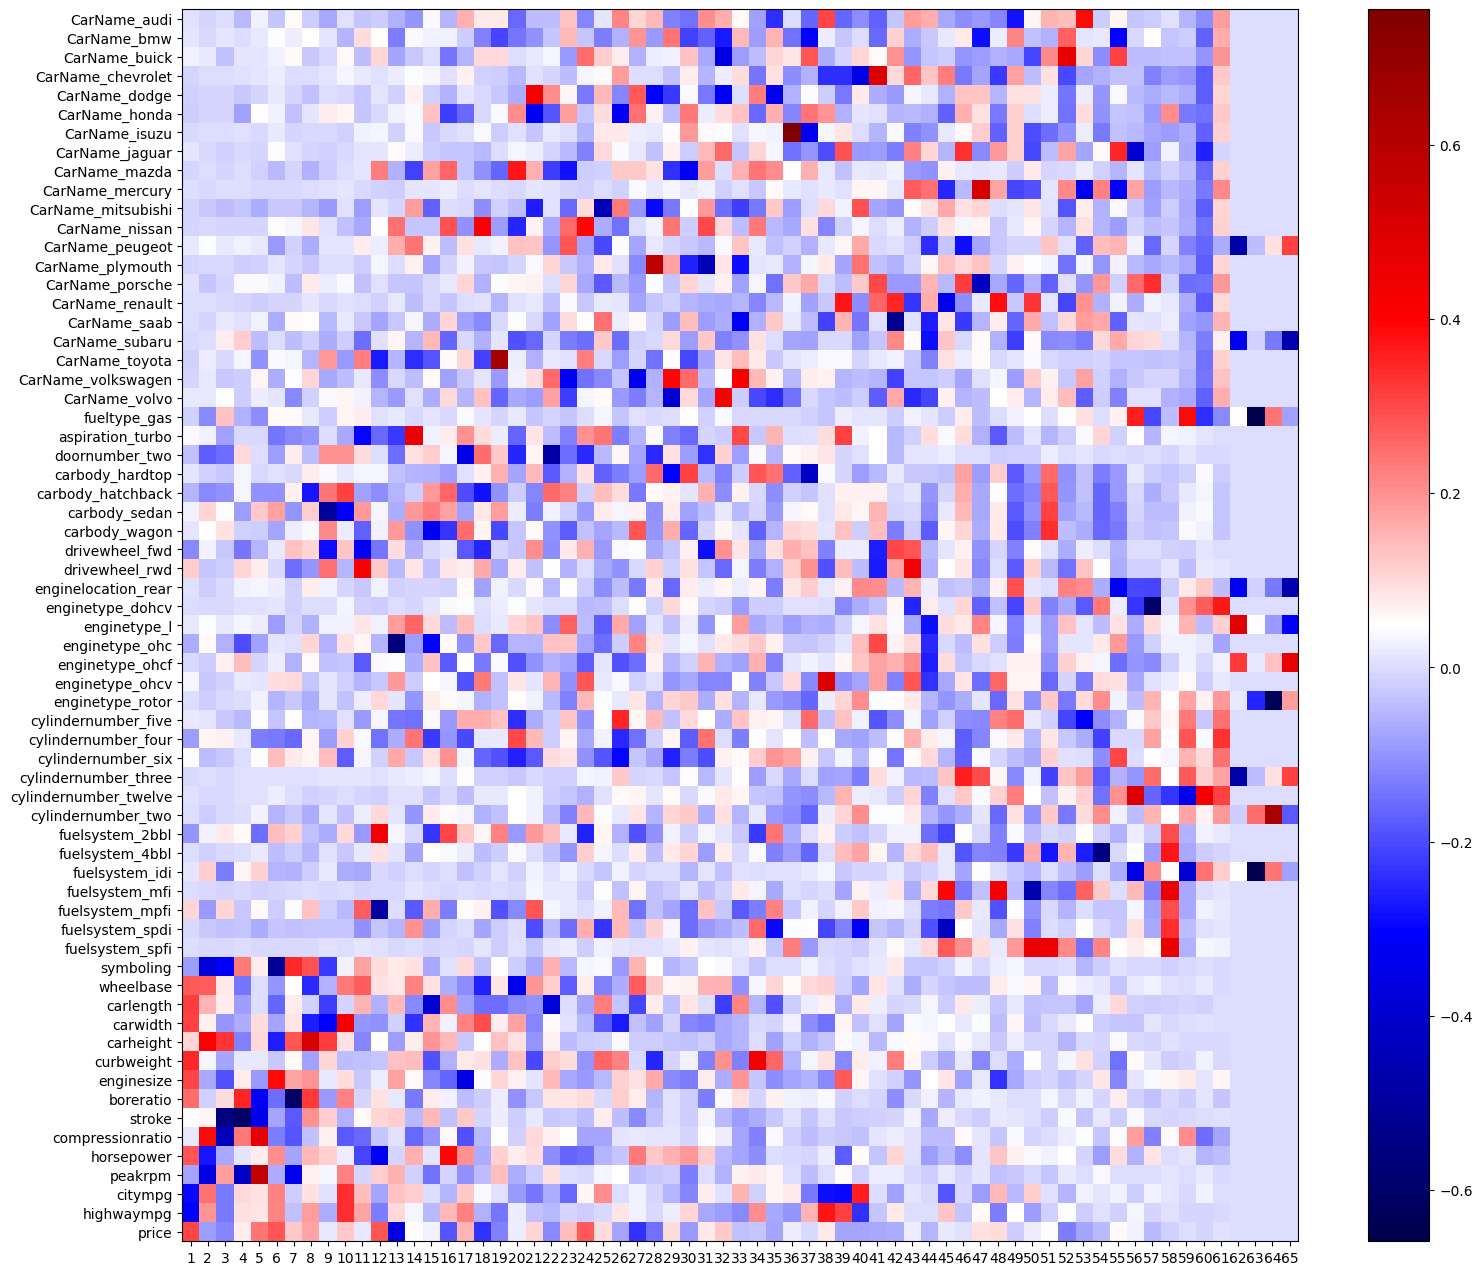

In [ ]:
# Heatmap componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 16))

componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='seismic', aspect='auto')

plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [ ]:
# Varianza explicada del modelo
modelo_pca.explained_variance_

array([8.07200463e+00, 2.97830779e+00, 1.46928942e+00, 1.10157278e+00,
       7.26147389e-01, 6.53155260e-01, 5.08623810e-01, 4.02022439e-01,
       3.53252854e-01, 3.20896359e-01, 2.86755331e-01, 2.26063385e-01,
       2.05816441e-01, 1.70984332e-01, 1.44838418e-01, 1.37088929e-01,
       1.20159870e-01, 1.06287174e-01, 9.77281126e-02, 8.88364425e-02,
       7.12856036e-02, 6.47204861e-02, 6.22974205e-02, 5.91560598e-02,
       5.82682758e-02, 4.75267849e-02, 4.32990186e-02, 4.12704885e-02,
       4.00393967e-02, 3.24029300e-02, 3.08604797e-02, 2.88710248e-02,
       2.65266766e-02, 2.41970602e-02, 2.24639973e-02, 2.12812930e-02,
       1.76983685e-02, 1.52221252e-02, 1.28994014e-02, 1.22431939e-02,
       1.16770938e-02, 9.00640336e-03, 8.17024800e-03, 7.40215815e-03,
       6.32129884e-03, 5.51173899e-03, 5.06234774e-03, 4.59216446e-03,
       3.71943115e-03, 3.50902767e-03, 3.10507195e-03, 2.99857911e-03,
       2.62975361e-03, 2.29119025e-03, 1.90491794e-03, 1.35231980e-03,
      

In [ ]:
# Porcentaje de varianza explicada por cada componente
modelo_pca.explained_variance_ratio_

array([4.25187495e-01, 1.56880389e-01, 7.73938463e-02, 5.80246162e-02,
       3.82493325e-02, 3.44045205e-02, 2.67914221e-02, 2.11762655e-02,
       1.86073600e-02, 1.69030031e-02, 1.51046470e-02, 1.19077390e-02,
       1.08412447e-02, 9.00648638e-03, 7.62926766e-03, 7.22106851e-03,
       6.32934154e-03, 5.59860646e-03, 5.14776357e-03, 4.67940074e-03,
       3.75492193e-03, 3.40910872e-03, 3.28147534e-03, 3.11600625e-03,
       3.06924281e-03, 2.50344190e-03, 2.28074711e-03, 2.17389563e-03,
       2.10904869e-03, 1.70680286e-03, 1.62555532e-03, 1.52076210e-03,
       1.39727511e-03, 1.27456411e-03, 1.18327617e-03, 1.12097801e-03,
       9.32249832e-04, 8.01815357e-04, 6.79467420e-04, 6.44902123e-04,
       6.15083178e-04, 4.74406328e-04, 4.30362399e-04, 3.89903775e-04,
       3.32970227e-04, 2.90327199e-04, 2.66655812e-04, 2.41889220e-04,
       1.95918571e-04, 1.84835707e-04, 1.63557607e-04, 1.57948168e-04,
       1.38520529e-04, 1.20686928e-04, 1.00340290e-04, 7.12325491e-05,
      

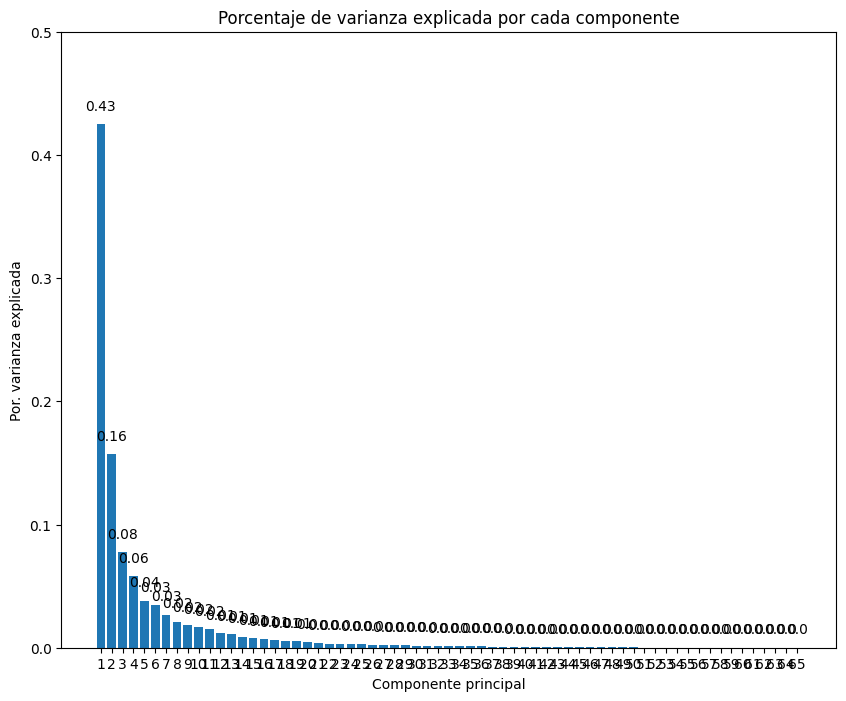

In [ ]:
#Gráfico de la varianza explicada por cada componente
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

ax.bar(x = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.5)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [ ]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.42518749, 0.58206788, 0.65946173, 0.71748635, 0.75573568,
       0.7901402 , 0.81693162, 0.83810789, 0.85671525, 0.87361825,
       0.8887229 , 0.90063064, 0.91147188, 0.92047837, 0.92810763,
       0.9353287 , 0.94165804, 0.94725665, 0.95240441, 0.95708382,
       0.96083874, 0.96424785, 0.96752932, 0.97064533, 0.97371457,
       0.97621801, 0.97849876, 0.98067265, 0.9827817 , 0.98448851,
       0.98611406, 0.98763482, 0.9890321 , 0.99030666, 0.99148994,
       0.99261092, 0.99354317, 0.99434498, 0.99502445, 0.99566935,
       0.99628444, 0.99675884, 0.9971892 , 0.99757911, 0.99791208,
       0.99820241, 0.99846906, 0.99871095, 0.99890687, 0.9990917 ,
       0.99925526, 0.99941321, 0.99955173, 0.99967242, 0.99977276,
       0.99984399, 0.99990874, 0.99995071, 0.99997549, 0.99998978,
       1.        , 1.        , 1.        , 1.        , 1.        ])

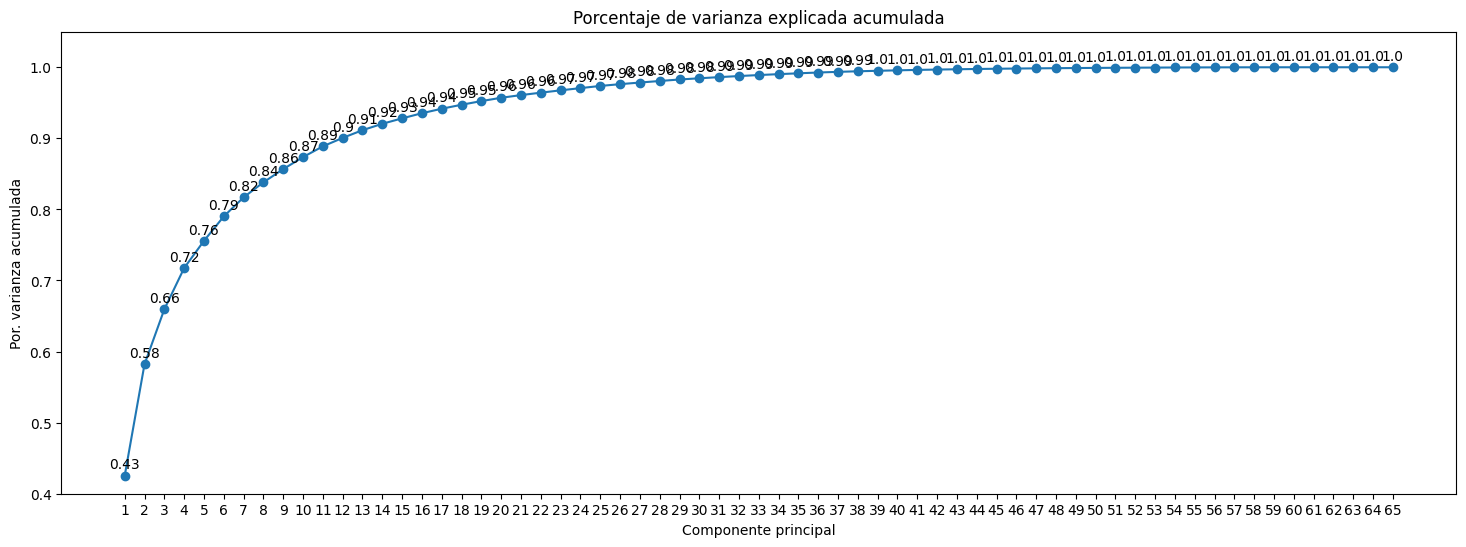

In [ ]:
#Gráfico de la varianza explicada acumulada
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
ax.plot(np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o')

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,5),
        ha='center'
    )

ax.set_ylim(0.4, 1.05)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [ ]:
# Proyección de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = indices,
    index   = datos.index
)
proyecciones.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65
0,-0.524516,-2.786252,0.034882,2.544530,0.096626,-0.315209,-0.107258,-0.261514,-0.263009,-1.042596,...,0.001359,0.040616,0.012241,0.033799,0.057009,-0.023722,5.460572e-16,4.980602e-16,-5.899995e-17,2.794660e-17
1,-0.408424,-2.818909,-0.011195,2.571594,0.185814,-0.208953,-0.060948,-0.197073,-0.257119,-0.996566,...,0.013286,0.023158,0.006549,0.034090,0.052583,-0.022081,5.251256e-16,4.771286e-16,-9.039733e-17,2.313755e-16
2,0.701812,-1.733281,-1.029945,-0.669147,0.391688,0.897033,1.701166,-0.915805,1.510240,-1.299549,...,0.055169,0.064009,0.026349,0.077065,0.071422,-0.053167,1.730487e-16,8.930634e-17,-1.974316e-16,-1.177265e-15
3,-0.246029,-0.352638,-0.004211,-1.076184,0.657851,-0.722041,0.352159,0.594292,-0.963128,-0.160225,...,0.029972,-0.037698,0.004853,0.057598,0.003129,0.031553,6.838516e-16,7.583461e-17,-2.177857e-16,-8.960421e-17
4,1.342102,-1.235421,0.140859,-1.214896,0.578703,-0.613431,0.790823,0.259007,-0.470187,-0.902196,...,0.009199,-0.000873,0.002490,-0.013746,0.001011,0.006274,2.506050e-16,-3.266124e-17,1.017642e-16,-8.941234e-17
5,0.657683,-1.344456,-0.228336,-1.151728,0.494127,-0.536620,0.759907,0.141786,-0.813603,-0.457789,...,0.008738,-0.013181,0.003274,0.002573,-0.017478,0.000552,3.775498e-16,9.219405e-17,-2.322948e-17,7.503222e-16
6,2.615603,0.190264,0.376584,-1.953808,0.855837,-0.737866,1.131675,-0.396913,-1.489785,0.652544,...,-0.018704,-0.002289,-0.008533,-0.023280,0.014996,0.002580,9.969938e-17,-1.168808e-16,1.351898e-16,-6.468077e-16
7,2.722052,0.131283,0.386849,-1.865735,0.754261,-0.956511,1.283831,-0.468296,-0.751650,0.994582,...,-0.015112,-0.005389,-0.004792,-0.018850,0.013258,0.003486,-1.762960e-17,-1.845767e-16,8.948754e-17,-1.159012e-16
8,3.488317,-0.232882,0.303098,-2.089684,1.075072,-0.771137,1.260357,-0.504308,-1.252980,0.282351,...,0.010931,-0.016438,-0.012700,0.008097,-0.005797,-0.019934,-2.168052e-16,-8.243989e-17,1.224651e-16,-2.808563e-16
9,2.046710,-1.754716,-0.074641,-1.462176,0.241583,0.063502,0.278125,-1.384671,0.469582,-0.088277,...,-0.033406,0.070115,0.016658,-0.017761,-0.015065,-0.017308,1.043969e-16,4.908333e-17,1.190391e-16,-1.899132e-16


In [ ]:
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = indices)
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65
0,-0.308839,-3.074049,0.142992,2.879134,0.225971,-0.470541,-0.258173,-0.310033,0.260318,-1.012081,...,0.299900,0.142951,-0.068770,0.293002,0.335752,-0.493165,0.057148,0.004115,0.006882,0.023155
1,-0.192746,-3.106706,0.096915,2.906198,0.315160,-0.364284,-0.211863,-0.245592,0.266208,-0.966051,...,0.311827,0.125493,-0.074462,0.293293,0.331326,-0.491523,0.057148,0.004115,0.006882,0.023155
2,1.181023,-2.417060,-1.230416,-0.268036,0.713329,1.414566,2.332732,-1.323236,2.748273,-1.504596,...,0.133147,-0.036725,-0.005326,0.439505,0.487892,-0.460622,0.057148,0.004115,0.006882,0.023155
3,-0.255115,-0.265437,0.238291,-1.654593,0.809603,-0.716318,0.587464,0.954133,-2.101373,-0.324102,...,0.096021,-0.080963,-0.065059,0.144282,-0.143235,0.250575,0.057148,0.004115,0.006882,0.023155
4,1.643808,-1.214760,0.226832,-1.837060,1.136947,-0.541693,1.293399,0.242301,-1.359861,-1.334639,...,0.211429,0.135025,0.101164,0.497068,-0.306135,0.599081,0.057148,0.004115,0.006882,0.023155


In [ ]:
#Recostruccion de las proyecciones
reconstruccion = pca_pipe.inverse_transform(proyecciones)

reconstruccion = pd.DataFrame(
                    reconstruccion,
                    columns = datos.columns,
                    index   = datos.index
                    )

dummies = df_dummies.columns

for dummy in dummies:
    reconstruccion[dummy] = (reconstruccion[dummy] > 0.5).astype(int)


print('---------------------')
print('Valores originales')
print('---------------------')
display(datos.head())

print('------------------------')
print('Valores reconstruidos')
print('------------------------')
display(reconstruccion.head())

---------------------
Valores originales
---------------------


,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,0,0,0,0,0,0,0,0,...,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,0,0,0,0,0,0,0,0,0,0,...,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0,0,0,0,0,0,0,0,0,0,...,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,1,0,0,0,0,0,0,0,0,0,...,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,1,0,0,0,0,0,0,0,0,0,...,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668


------------------------
Valores reconstruidos
------------------------


,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,0,0,0,0,0,0,0,0,...,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,0,0,0,0,0,0,0,0,0,0,...,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0,0,0,0,0,0,0,0,0,0,...,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,1,0,0,0,0,0,0,0,0,0,...,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,1,0,0,0,0,0,0,0,0,0,...,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668


In [ ]:
modelo_pca_2 = PCA(n_components=5)
modelo_pca_2.fit(datos)

PCA(n_components=5)

In [ ]:
df2 = pd.DataFrame(
    data    = modelo_pca_2.components_,
    columns = datos.columns,
    index   = ['PC1','PC2','PC3','PC4','PC5']
      )
df2

,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
PC1,0.007668,0.013907,0.029482,-0.008883,-0.013079,-0.020900,-0.005742,0.012868,-0.010719,0.001655,...,0.341753,0.305732,0.252182,0.045296,0.019582,0.282253,-0.073823,-0.290442,-0.300798,0.307880
PC2,-0.007569,-0.004533,0.018994,0.001317,-0.010256,-0.008155,-0.000129,-0.005391,-0.000248,-0.001628,...,0.033246,-0.071385,-0.017745,0.062259,0.387631,-0.276407,-0.360393,0.245031,0.196793,-0.086608
PC3,0.003003,0.013947,-0.035584,-0.001239,-0.007821,-0.007759,0.001491,-0.016143,-0.008486,0.001514,...,-0.077719,-0.190911,0.093404,-0.551287,-0.438057,-0.069542,0.182428,-0.134964,-0.135110,-0.122197
PC4,-0.048123,-0.000518,0.012824,0.006389,-0.025179,-0.079469,0.004419,-0.006377,0.002967,0.003017,...,0.019698,0.072408,0.350495,-0.594663,0.235897,0.014852,-0.420204,0.101793,0.091866,0.071775
PC5,0.031441,0.016034,0.013476,0.010086,-0.010863,0.049107,-0.002898,-0.011461,-0.014120,-0.004068,...,0.017267,-0.092771,-0.306464,-0.342604,0.451662,0.072184,0.568267,0.088157,0.083966,0.236530


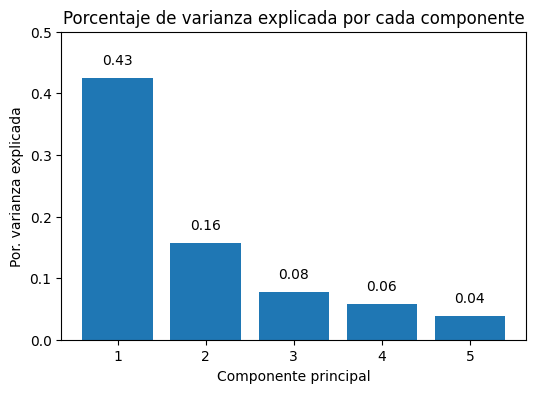

In [ ]:
# Varianza explicada del modelo
modelo_pca_2.explained_variance_
# Porcentaje de varianza explicada por cada componente
modelo_pca_2.explained_variance_ratio_

#Gráfico de la varianza explicada por cada componente
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

ax.bar(x = np.arange(modelo_pca_2.n_components_) + 1,
    height = modelo_pca_2.explained_variance_ratio_)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca_2.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca_2.n_components_) + 1)
ax.set_ylim(0, 0.5)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [ ]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca_2.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.42518749, 0.58206788, 0.65946173, 0.71748635, 0.75573568])

In [ ]:
prop_varianza_acum

array([0.42518749, 0.58206788, 0.65946173, 0.71748635, 0.75573568])

In [ ]:
col   = [1,2,3,4,5]

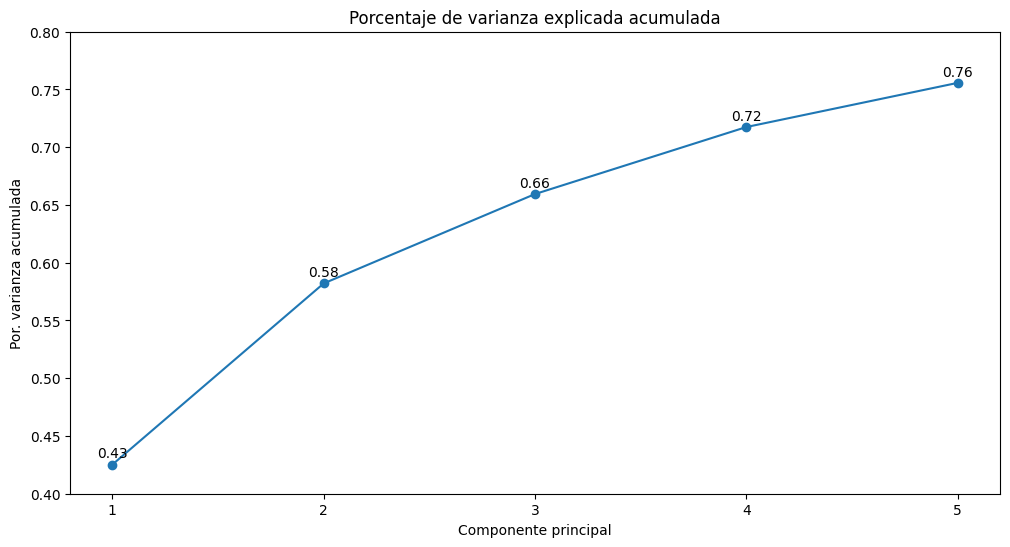

In [ ]:
#Gráfico de la varianza explicada acumulada
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

ax.plot(col,
    prop_varianza_acum,
    marker = 'o')

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,5),
        ha='center'
    )

ax.set_ylim(0.4, 0.8)
ax.set_xticks(col)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');